In [26]:
import numpy as np
import matplotlib.pyplot as plt
from filter_inference import calculate_corr_all
import os, pickle

## Figure 1. Schematics

- neurons in a network; with spike train shown
- inferred neuron filters for 2 observed neurons; covariance

In [27]:
# raster plot of spike train
filename="spk_train_64_2000000_b_-2_-1_diag_weight_1.5"
with open(os.path.join("/home/tong/hidden-neuron-simulation/data", filename), "rb") as f:
    spk_train = pickle.load(f)


In [34]:
spk_train.N = 3

[5030, 5500]
[862, 458, 321, 501, 818, 435, 483, 461, 646, 1324, 583, 468, 812, 343, 717, 582, 1066, 1143, 1167, 1029, 469, 344, 509, 588, 706, 527, 382, 517, 412, 775, 825, 1205, 813, 593, 716, 516, 312, 916, 850, 824, 675, 674, 1197, 554, 1232, 223, 606, 803, 502, 641, 434, 1096, 577, 784, 1198, 1137, 688, 525, 1145, 578, 593, 770, 438, 1035]
[939, 516, 337, 552, 897, 480, 526, 498, 714, 1448, 635, 517, 889, 365, 793, 641, 1168, 1256, 1277, 1122, 515, 371, 549, 651, 768, 567, 424, 563, 452, 869, 892, 1325, 895, 634, 777, 565, 349, 1005, 919, 896, 739, 754, 1317, 599, 1345, 249, 676, 876, 551, 691, 476, 1203, 619, 853, 1320, 1243, 738, 570, 1257, 636, 644, 842, 484, 1125]


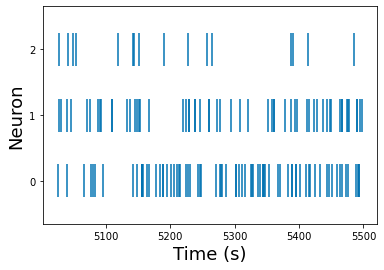

In [41]:

spk_train.plot_raster(t_window=[5030,5500], savefig=Tr)

## Figure 2. Inferred filters change as data volume and observed neuron change

figure saved!


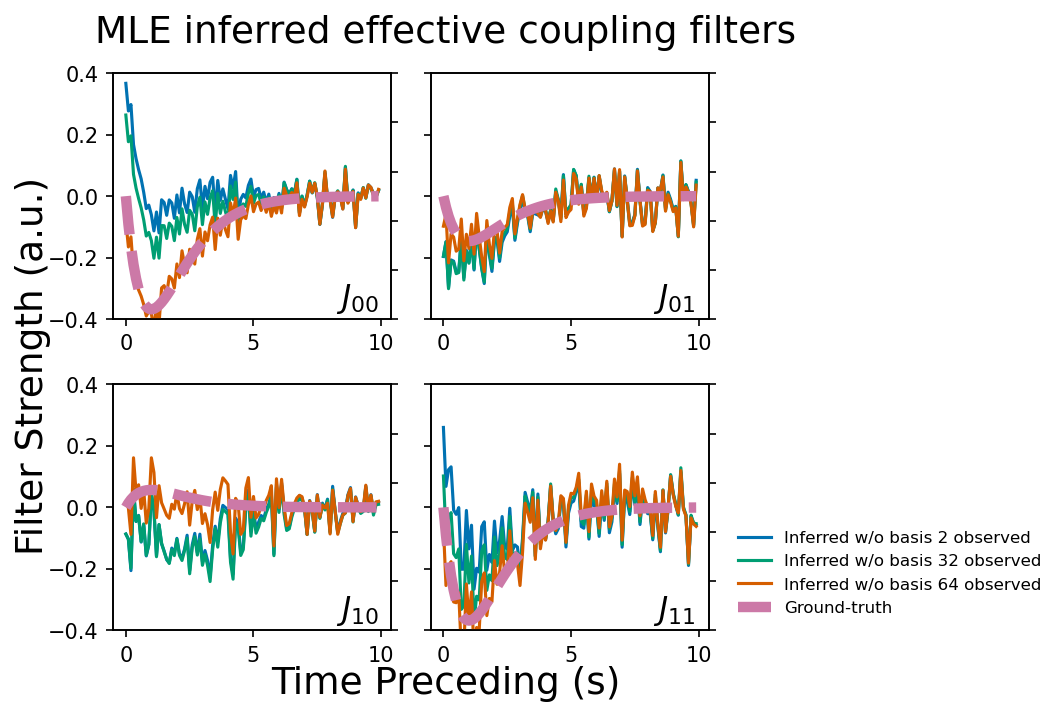

In [20]:
from figure import plot_mle_cov_vary_obs

w_true = np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")
plot_mle_cov_vary_obs(w_true, n=2, obs=[2,32,64], figsize=(7,4.3), data_dir="Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", savefig=True)

figure saved!


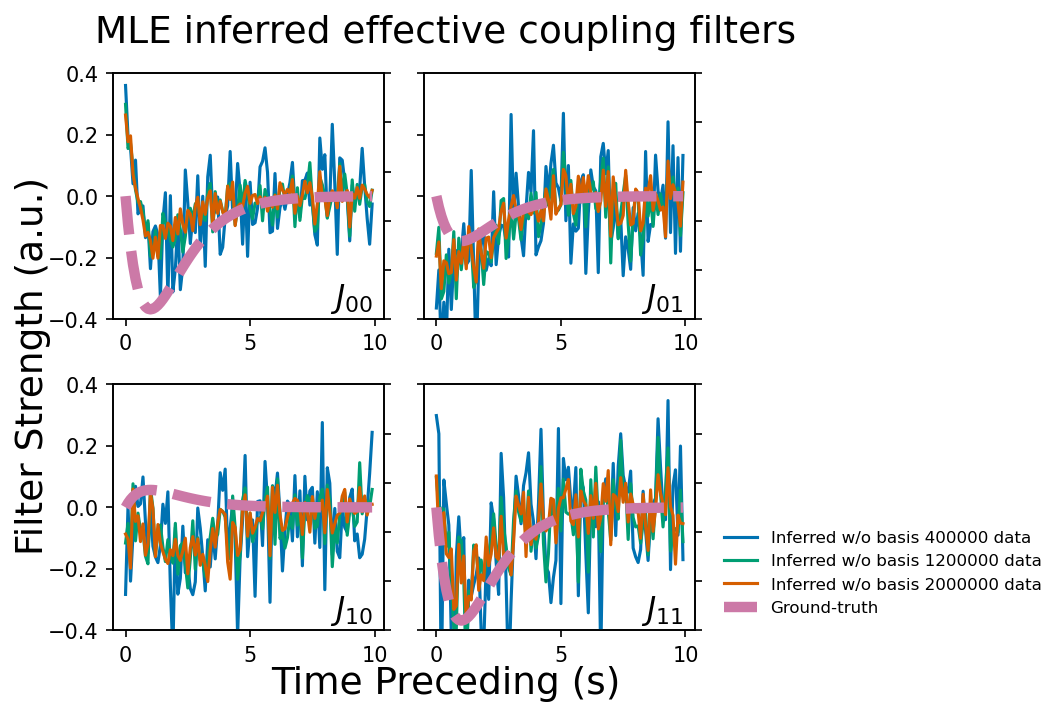

In [21]:
from figure import plot_mle_cov_vary_dp

w_true = np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")
plot_mle_cov_vary_dp(w_true, n=2, obs=32, dp=[0.2,0.6,1], figsize=(7,4.3), data_dir="Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", savefig=True)

## Figure 3. Correlation vs. Coupling Strength/Data Volume: random network with -1 diagonal

In [4]:
# correlation vs. coupling strength; fix 2m data volume
from filter_inference import calculate_corr_all

cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5"
filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5"
calculate_corr_all(N_i=0, N_j=0, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)

{2: 0.9951793637142862,
 4: 0.9948402846948176,
 8: 0.9889732800600012,
 16: 0.9791397934633708,
 32: 0.8516396332842104,
 48: 0.27918911153300113,
 64: 0.16003356847688674}

In [9]:
calculate_corr_all(N_i=1, N_j=0, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)

{2: 0.999190859097611,
 4: 0.9991612564451283,
 8: 0.9977739885008386,
 16: 0.9981696504827182,
 32: 0.9965737988025919,
 48: 0.8186210539344002,
 64: 0.6723482102134182}

In [23]:
calculate_corr_all(N_i=4, N_j=4, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)

{8: 0.9833632522491005,
 16: 0.9329592608418429,
 32: 0.8249028950399405,
 48: 0.8054503482558419,
 64: 0.5254422107724198}

In [18]:
np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")[:4,:4]

array([[-1.        ,  0.15426689,  0.        ,  0.        ],
       [-0.39727063, -1.        ,  0.30892423,  0.        ],
       [ 0.        ,  0.        , -1.        , -0.14465448],
       [-0.27726577,  0.        ,  0.04854696, -1.        ]])

Text(0.5, 1.0, 'Correlation decreases as more neurons observed')

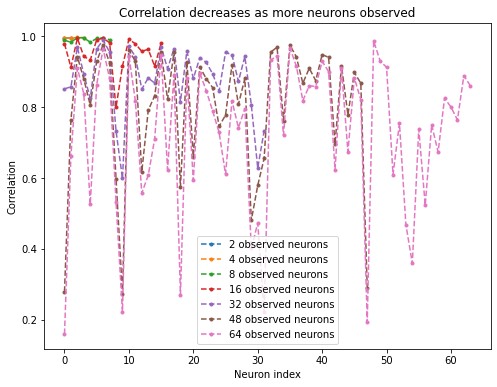

In [47]:
corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

for i in range(64):
    for obs in [2, 4, 8, 16, 32, 48, 64]:
        corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
        if obs in corr_dict:   
            corr[obs].append(corr_dict[obs])

fig = plt.figure(figsize=(8,6))
corr_list = list(corr.values())
for i in range(len(corr_list)):
    plt.plot(corr_list[i], ".--", label=f"{list(corr.keys())[i]} observed neurons")
plt.legend()
# plt.yscale('log')
plt.xlabel("Neuron index")
plt.ylabel("Correlation")
plt.title("Correlation decreases as more neurons observed")

Text(0.5, 1.0, 'Correlation decreases as more neurons observed')

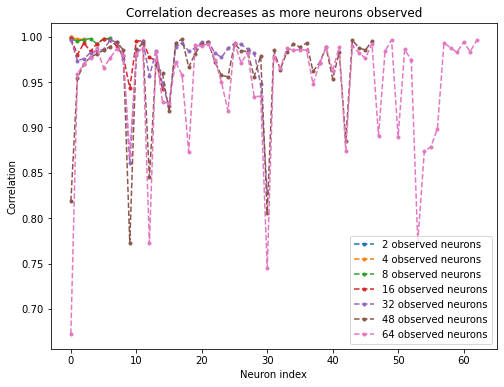

In [45]:
corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

for i in range(1,64):
    for obs in [2, 4, 8, 16, 32, 48, 64]:
        corr_dict = calculate_corr_all(N_i=i, N_j=i-1, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
        if obs in corr_dict:   
            corr[obs].append(corr_dict[obs])

fig = plt.figure(figsize=(8,6))
corr_list = list(corr.values())
for i in range(len(corr_list)):
    plt.plot(corr_list[i], ".--", label=f"{list(corr.keys())[i]} observed neurons")
plt.legend()
plt.xlabel("Neuron index")
plt.ylabel("Correlation")
plt.title("Correlation decreases as more neurons observed")

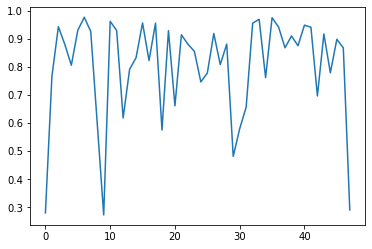

In [25]:
corr = []

for i in range(48):
    corr.append(calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)[48])

plt.plot(corr)

In [59]:
corr_median = []
corr_std = []
for weight in ["_weight_0_5", "", "_weight_1_5"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})

In [55]:
corr_median

[{2: 0.9965416676139596,
  4: 0.9966915448738791,
  8: 0.9968812702759882,
  16: 0.996568021173228,
  32: 0.9960281594989494,
  48: 0.9955572837961023,
  64: 0.9948610259380031},
 {2: 0.9976403692783299,
  4: 0.9968389002597847,
  8: 0.9963638744400962,
  16: 0.9945403514055844,
  32: 0.9895994659206119,
  48: 0.9844560985150018,
  64: 0.976051530446665},
 {2: 0.9950859226589855,
  4: 0.9957036406891381,
  8: 0.992202900597463,
  16: 0.9711897776101426,
  32: 0.8933445302447549,
  48: 0.8712607083694078,
  64: 0.7979984133265812}]

In [18]:
corr_median = []
corr_std = []
for weight in ["_weight_0_5", "", "_weight_1_5"]:
    cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance{weight}"
    filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag{weight}"
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}

    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=1, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})

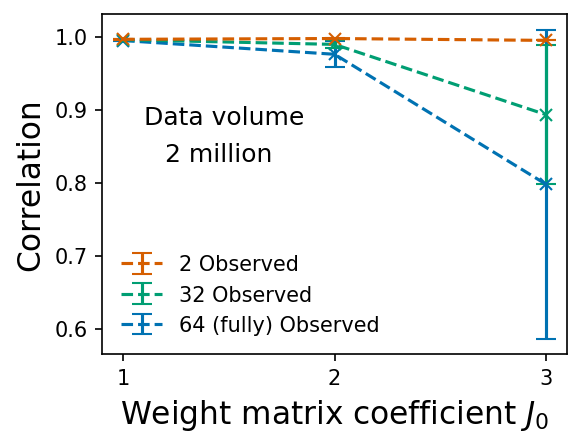

In [19]:
fig = plt.figure(constrained_layout=False, figsize=(4, 3), dpi=150)
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    plt.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--x", capsize=5, label=f"{obs} {full}Observed")
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
plt.xlabel("Weight matrix coefficient $J_0$", fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.xticks([1, 2, 3], [1, 2, 3])
plt.text(1.1, 0.88, "Data volume", fontsize=12)
plt.text(1.2, 0.83, "2 million", fontsize=12)
filename="Correlation_J0.pdf"
plt.savefig(f'./Figures/{filename}', bbox_inches="tight")

In [14]:
corr_median = []
corr_std = []

cov_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5"
filter_path=f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5"
for dp in [0.2, 0.6, 1]:
    corr = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
    for i in range(64):
        for obs in [2, 4, 8, 16, 32, 48, 64]:
            corr_dict = calculate_corr_all(N_i=i, N_j=i, cov_path=cov_path, filter_path=filter_path, dp=dp, total_data=2000000)
            if obs in corr_dict:   
                corr[obs].append(corr_dict[obs])
    corr_median.append( {key: np.median(value) for key, value in corr.items()})
    corr_std.append( {key: np.std(value) for key, value in corr.items()})

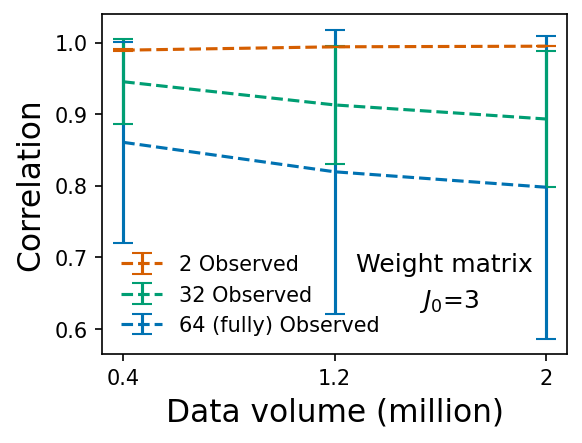

In [17]:
fig = plt.figure(constrained_layout=False, figsize=(4, 3), dpi=150)
for obs in [2, 32, 64][::-1]:
    if obs == 64:
        full = "(fully) "
    else:
        full = ""
    plt.errorbar([1, 2, 3], [corr_[obs] for corr_ in corr_median], yerr=[corr_[obs] for corr_ in corr_std], fmt="--", capsize=5, label=f"{obs} {full}Observed")
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)
# plt.legend(frameon=False)
plt.xlabel("Data volume (million)", fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.xticks([1, 2, 3], [0.4, 1.2, 2])
plt.text(2.1, 0.68, "Weight matrix", fontsize=12)
plt.text(2.4, 0.63, "$J_0$=3", fontsize=12)
filename="Correlation_data_volume.pdf"
plt.savefig(f'./Figures/{filename}', bbox_inches="tight")